#                                Multilinear Regression

### 1.importing data

### 2.getting data ready

### 3.checking linearity
    + pairplot

### 4.correlation analysis
    + correlation (relation between x and y)
      ++ (point to notice - 1 : is there any relation between x and x) 
    + building model (trial mode)
      ++ (point to notice - 2 : rquared, AIC, p-value, adj_rsquared)
    
### 5.dealing with problematic columns 
    + a-1) checking if x and x have good correlation then can we drop one of them
      a-2) is p-value significant or not
           (checking how individual feature affecting the model prediction)
    + multicollinearity (VIF)
    + error / residue handing
    + improving model (trial mode)
    
### 6.dealing with problematic rows
    + checking influential points (cook's distance)
    + improving model (trial mode)

### 7.final model
    + fitting
    + testing
    + prediction


    
    
   


In [110]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### 1.Importing data

In [111]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1') #reading csv file
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [112]:
data1=pd.concat([data.iloc[:,2:4], data.iloc[:,6:7], data.iloc[:,8:9], data.iloc[:,12:14], data.iloc[:,15:18]], axis=1)
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### 2.getting data ready

In [113]:
# data1.shape               #it tells about no. of records and features
# data1.columns             #determines column names
# data1.dtypes              #checking data types
# data1.isna().sum()        #checking --- is there any null value or not

In [114]:
data1.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [115]:
data1[data1.duplicated()].shape       #checking no. of duplicate records

(1, 9)

In [116]:
data1[data1.duplicated()]            #finding particular duplicate records 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [117]:
data1=data1.drop_duplicates()      #droping duplicate records

In [118]:
data1.shape

(1435, 9)

In [119]:
data1.rename({'Age_08_04': 'Age'}, axis=1,inplace=True)
data1.rename({'cc': 'CC'}, axis=1,inplace=True)
data1.rename({'Quarterly_Tax': 'Qtax'}, axis=1,inplace=True)

In [120]:
data1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### 2.2 outlier detection

In [121]:
#find outliers for each column (dependent and independent)
#might be a chance some value may be entered wrongly in a particular column
#thats we need to check outliers for suspected columns

#gears, km, doors (what is typing mistakes and a one value is 40 instead of 4)
#so suspected columns k liye check kr lo

#logically think for for a oulier (like vehicle cc > 14000 ; surely it is an outlier)

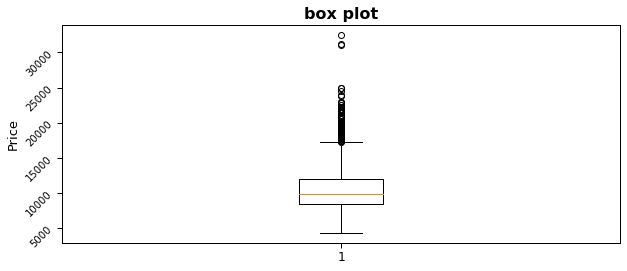

In [122]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Price", fontsize = 13 )                                          #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


plt.boxplot(x='Price', data=data1)                                 #some outliers but same as compared to Qtax and Weight
                                                                   #same recods and hence they depend on each other 
                                                                   #these are not outliers (109,110,111)
#plt.boxplot(x='Age', data=data1)                                  #no outliers                                      
#plt.boxplot(x='KM', data=data1)                                   #maximum km = 2.5lakh; possible                         
#plt.boxplot(x='HP', data=data1)                                   #so many might be sports cars     
#plt.boxplot(x='CC', data=data1)                                   #one outlier ; cc > 14000
#plt.boxplot(x='Doors', data=data1)                                #no outlier                         
#plt.boxplot(x='Gears', data=data1)                                #no outlier
#plt.boxplot(x='Qtax', data=data1)                                 #some outlier may be            
#plt.boxplot(x='Weight', data=data1)                               #some outlier may be ; compare these with Qtax
                                                                   #same recods and hence they depend on each other 
                                                                   #these are not outliers (109,110,111)






plt.show()                                                                   #print/display the plot
#plt.savefig("Used Cars Bar.png")                                            #to create a .png file of our plot

In [123]:
print(np.where(data1['CC']>14000))
print(np.where(data1['Qtax']>282))
print(np.where(data1['Weight']>1400))
print(np.where(data1['HP']>180))
print(np.where(data1['Price']>25000))  

#looking all above simultaneously i conclude that only 
#for 'CC' we have outliers

(array([80], dtype=int64),)
(array([109, 110, 111], dtype=int64),)
(array([109, 110, 111, 220, 959], dtype=int64),)
(array([  8,  10,  11,  12,  13,  14,  15,  16,  49,  53, 140], dtype=int64),)
(array([109, 110, 111], dtype=int64),)


In [124]:
data1.loc[[80]]                              #16000 cc is much high and look at HP, it is just 110

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [125]:
data1.drop(labels=80, axis=0,inplace=True)
data1.reset_index(drop=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1434 non-null   int64
 1   Age     1434 non-null   int64
 2   KM      1434 non-null   int64
 3   HP      1434 non-null   int64
 4   CC      1434 non-null   int64
 5   Doors   1434 non-null   int64
 6   Gears   1434 non-null   int64
 7   Qtax    1434 non-null   int64
 8   Weight  1434 non-null   int64
dtypes: int64(9)
memory usage: 112.0 KB


### 3.Checking linearity

#### a) pairplot

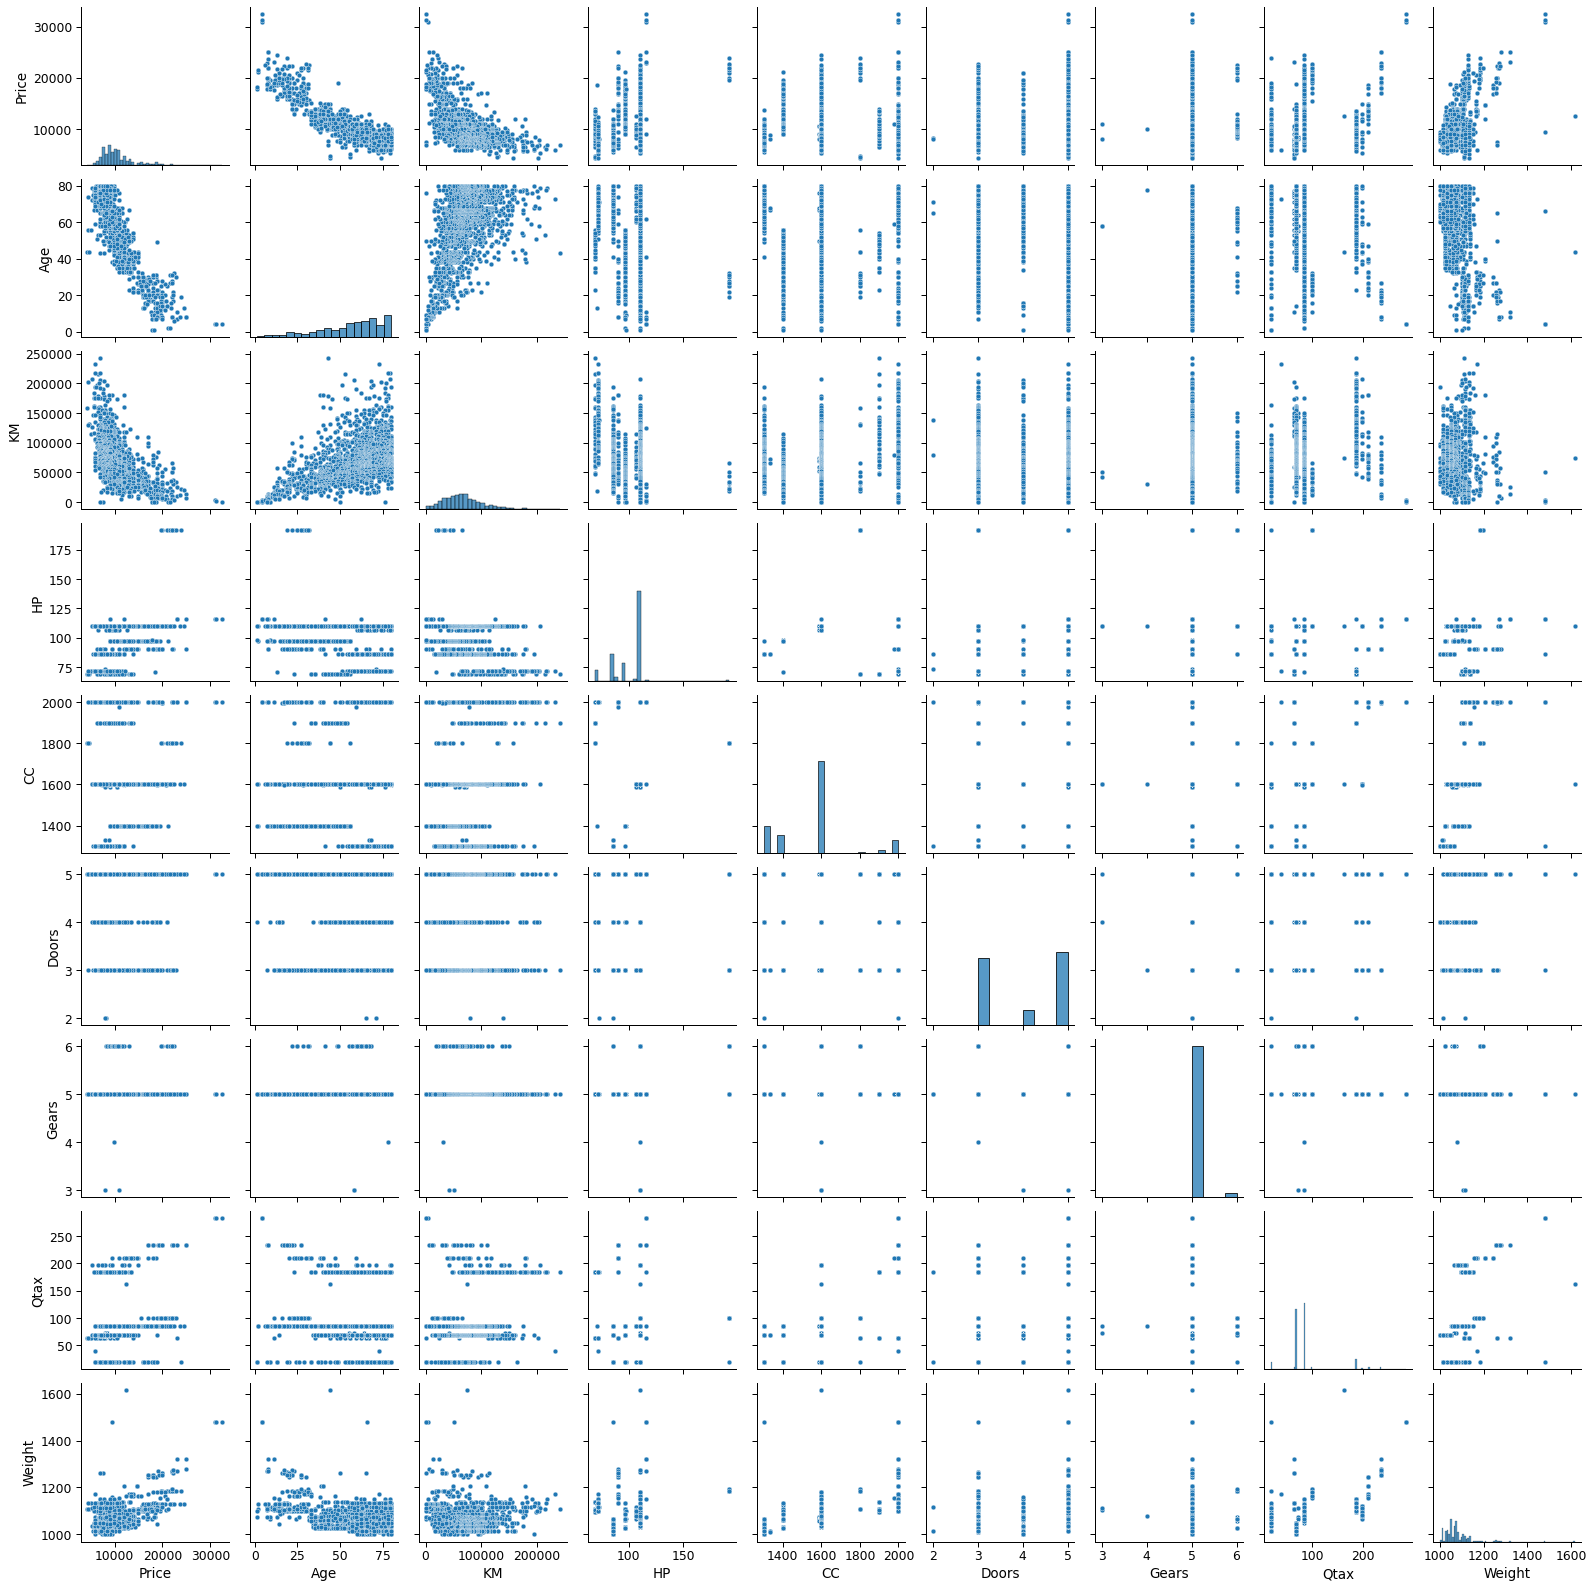

In [126]:
sns.pairplot(data1)

#### b) heatmap

<AxesSubplot:>

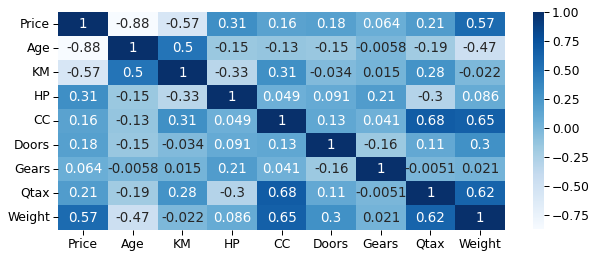

In [127]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size

sns.set_context('paper', font_scale=1.4)
correlation = data1.corr()

sns.heatmap(correlation, 
            annot=True, 
            cmap='Blues'
           )

### 4.Correlation analysis

#### a)correlation

In [128]:
data1.corr()                     #there should be good correlation between x and y
                                 #and there should be no or less correlation between x and x

,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876059,-0.568724,0.313836,0.159904,0.182385,0.064171,0.211395,0.574483
Age,-0.876059,1.000000,0.503851,-0.154800,-0.129482,-0.145941,-0.005799,-0.193144,-0.465226
KM,-0.568724,0.503851,1.000000,-0.332623,0.305675,-0.034308,0.014772,0.283774,-0.022152
HP,0.313836,-0.154800,-0.332623,1.000000,0.049366,0.091444,0.209722,-0.302457,0.086464
CC,0.159904,-0.129482,0.305675,0.049366,1.000000,0.125329,0.041015,0.677757,0.650814
Doors,0.182385,-0.145941,-0.034308,0.091444,0.125329,1.000000,-0.160060,0.107171,0.300827
Gears,0.064171,-0.005799,0.014772,0.209722,0.041015,-0.160060,1.000000,-0.005094,0.021472
Qtax,0.211395,-0.193144,0.283774,-0.302457,0.677757,0.107171,-0.005094,1.000000,0.622477
Weight,0.574483,-0.465226,-0.022152,0.086464,0.650814,0.300827,0.021472,0.622477,1.000000


In [129]:
#relation between Price and some other feature is good enough to build model
#lets make the model and analyse it

#relation between Qtax and Weight, CC and Qtax, CC and Weight is not bad - [we will analyse it later - in next part]


#### b)building model (trial 1)

In [130]:
import statsmodels.formula.api as sms
model = sms.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()           
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:49:40   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.0

In [131]:
#Rsquared is good 

#p-value for Doors is not significant [we will analyse it later - in next part]

### 5. dealing with problematic columns

#### a-1)dealing with x-values which have good correlation

In [132]:
#there is relation between Qtax-Weight, CC-Qtax, CC-Weight 
#yet it is not high but lets analyse it

In [134]:
import statsmodels.formula.api as sms
m1 = sms.ols("Price~Qtax",data=data1).fit() 
m2 = sms.ols("Price~Weight",data=data1).fit()
m3 = sms.ols("Price~Qtax+Weight",data=data1).fit()
print(m1.rsquared,m1.pvalues)
print(m2.rsquared,m2.pvalues)
print(m3.rsquared,m3.pvalues)   

#out of 100% Qtax predict 4% and weight predict 33%
#and together predict 36% 
#------------also they have significant p-values
#hence we cannot drop one of them
#i.e. we have to consider both the features while predicting model.

0.04468775723082463 Intercept    5.203418e-249
Qtax          5.978813e-16
dtype: float64
0.3300309657044822 Intercept     1.295170e-77
Weight       1.045176e-126
dtype: float64
0.36493059222527946 Intercept     8.395167e-92
Qtax          2.171276e-18
Weight       4.845610e-129
dtype: float64


In [135]:
import statsmodels.formula.api as sms
m1_2 = sms.ols("Price~Qtax",data=data1).fit() 
m2_2 = sms.ols("Price~CC",data=data1).fit()
m3_2 = sms.ols("Price~Qtax+CC",data=data1).fit()
print(m1_2.rsquared,m1_2.pvalues)
print(m2_2.rsquared,m2_2.pvalues)
print(m3_2.rsquared,m3_2.pvalues)   

#out of 100% Qtax predict 4% and CC predict 2%
#and together predict 4% 
#also they have significant p-values
#hence we cannot drop one of them
#i.e. we have to consider both the features while predicting model.

0.04468775723082463 Intercept    5.203418e-249
Qtax          5.978813e-16
dtype: float64
0.025569250265968013 Intercept    1.964339e-13
CC           1.134684e-09
dtype: float64
0.04519926356801107 Intercept    1.224445e-19
Qtax         6.831883e-08
CC           3.814129e-01
dtype: float64


In [136]:
import statsmodels.formula.api as sms
m1_3 = sms.ols("Price~CC",data=data1).fit() 
m2_3 = sms.ols("Price~Weight",data=data1).fit()
m3_3 = sms.ols("Price~CC+Weight",data=data1).fit()
print(m1_3.rsquared,m1_3.pvalues)
print(m2_3.rsquared,m2_3.pvalues)
print(m3_3.rsquared,m3_3.pvalues)   

#out of 100% CC predict 2% and weight predict 33%
#and together predict 40% 
#also they have significant p-values
#hence we cannot drop one of them
#i.e. we have to consider both the features while predicting model.

0.025569250265968013 Intercept    1.964339e-13
CC           1.134684e-09
dtype: float64
0.3300309657044822 Intercept     1.295170e-77
Weight       1.045176e-126
dtype: float64
0.4094604198923151 Intercept    7.390041e-110
CC            3.727040e-41
Weight       8.001874e-158
dtype: float64


#### a-2) dealing with insignificant p-values

In [137]:
#p-value for Doors is not significant, lets analyse these features

In [138]:
import statsmodels.formula.api as sms
m4 = sms.ols("Price~Doors",data=data1).fit()
print(m4.rsquared,m4.pvalues)


#out of 100% Doors predict 3.3% 

0.03326427569906165 Intercept    3.445070e-75
Doors        3.426651e-12
dtype: float64


#### b) multicollinearity (VIF)

In [139]:
#For vif we only talk about x-values
#high vif implies high Rsquared implies high correlation 
#and here we talk about x-value, so we need less correlation between them and hence need less vif
import statsmodels.formula.api as smf

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Qtax+Weight',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Qtax+Weight',data=data1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Qtax+Weight',data=data1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Qtax+Weight',data=data1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Qtax~Age+KM+HP+CC+Doors+Gears+Weight',data=data1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Qtax',data=data1).fit().rsquared
vif_WT=1/(1-rsq_WT)

# storing VIF in a DataFrame
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Qtax','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

#we get no relation between x-values

,Variables,Vif
0,Age,1.878917
1,KM,1.908320
2,HP,1.584414
3,CC,2.748130
4,Doors,1.162567
5,Gears,1.101067
6,Qtax,2.842987
7,Weight,2.833743


#### C) error / residue handling 

#### c-1)test for normality of residuals (Q-Q Plot)

In [140]:
model.resid

0      -3013.565909
1      -2301.656226
2      -2536.949796
3      -1183.995128
4      -2171.372341
           ...     
1431   -1470.611964
1432    2409.055329
1433     -91.765915
1434   -1464.053275
1435   -3016.948423
Length: 1434, dtype: float64

D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


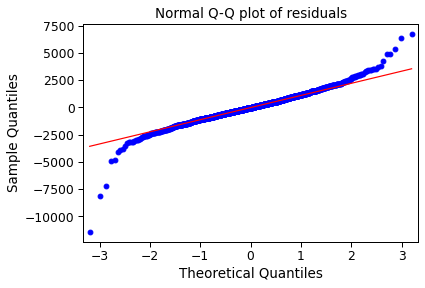

In [145]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [146]:
list(np.where(model.resid<-7500))         #these might cause problem while predicting [we will handle these later]

[array([219, 958], dtype=int64)]

#### c-2)Residual Plot for Homoscedasticity

In [147]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

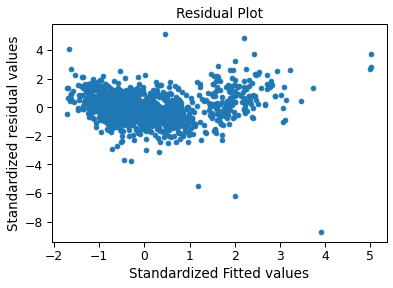

In [148]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [149]:
#checking variance of error :
#we get most of the error lies between -4 and 4 and it is a good thing

#### c-3)Residual Vs Regressors

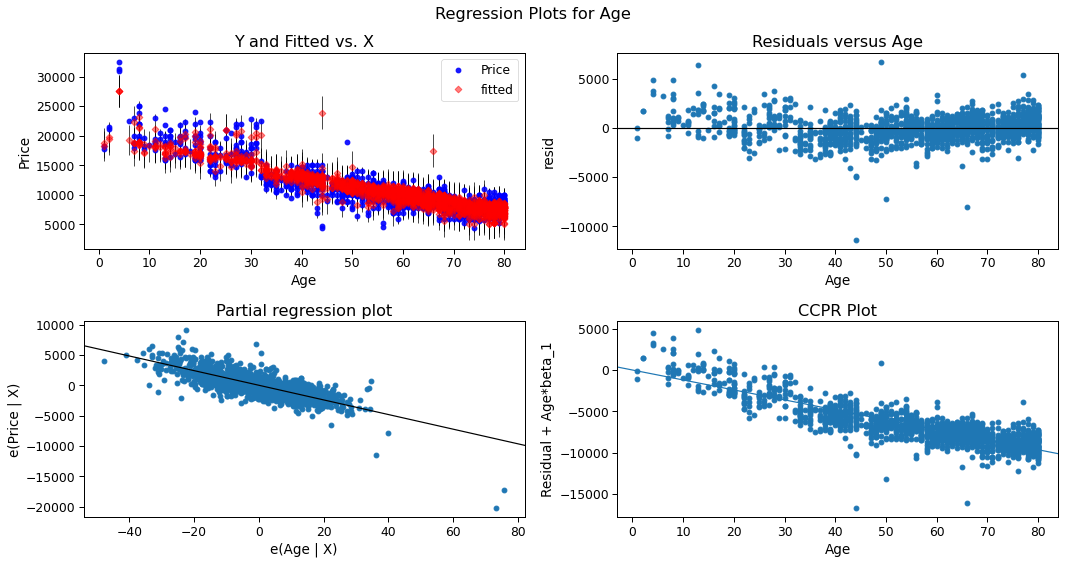

In [150]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

#partial regression plot : if we get a slent line then adding this feature to the model will cause
#changes in the model. if we get a straight line then it means adding this feature will not change
#the model.

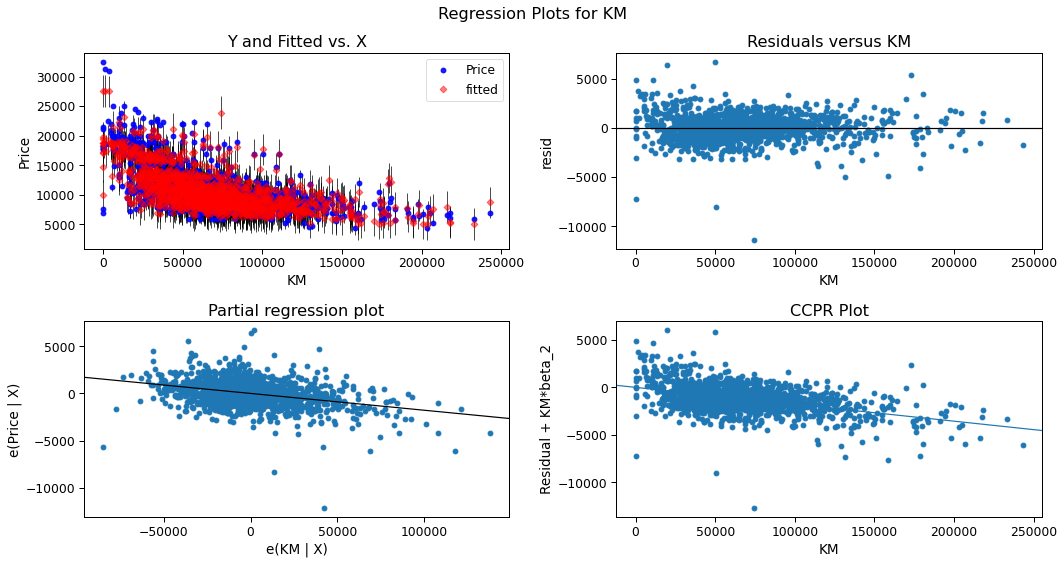

In [151]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

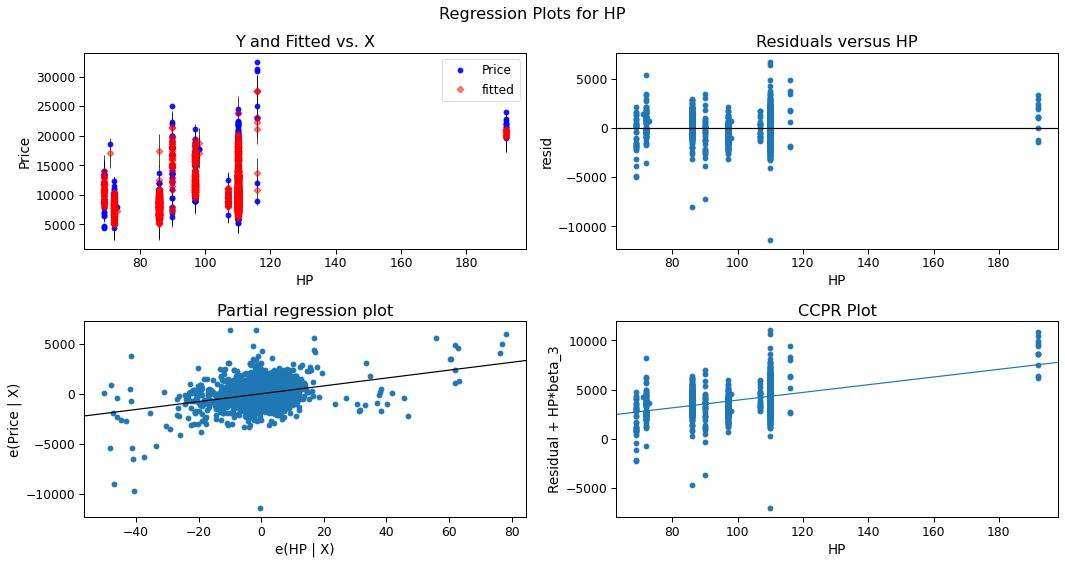

In [152]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

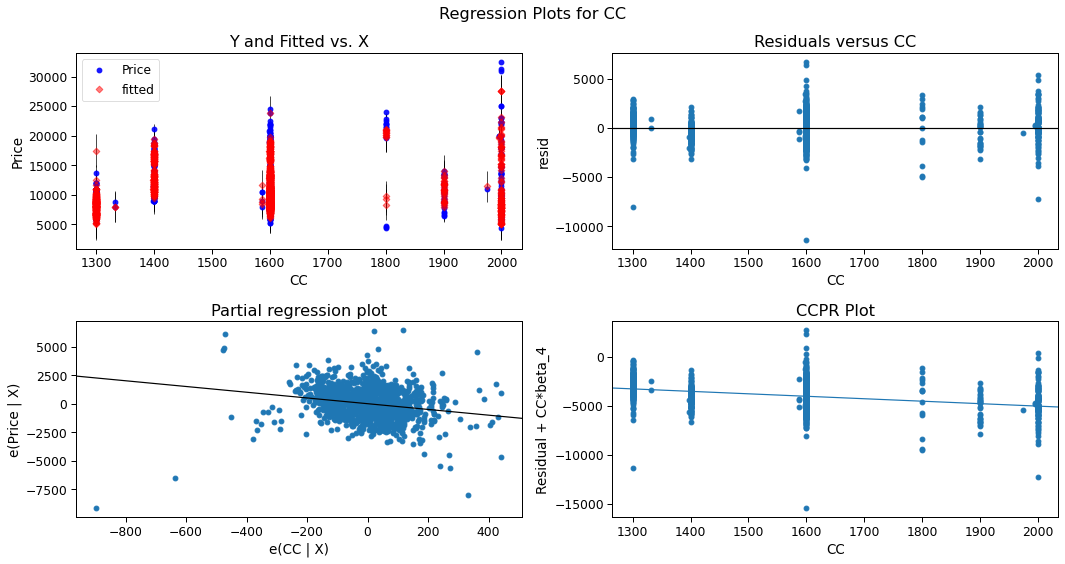

In [153]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

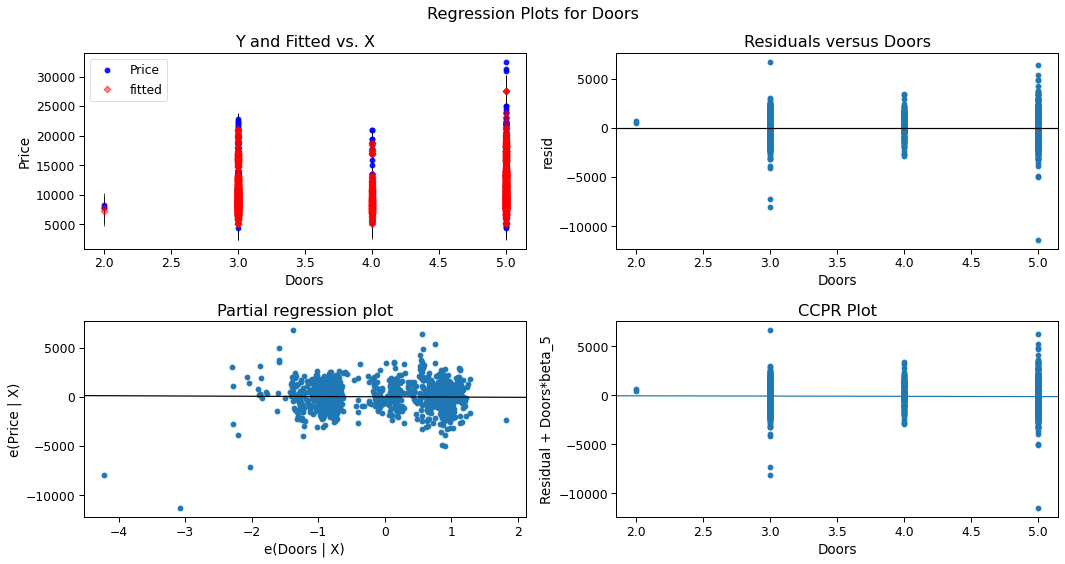

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

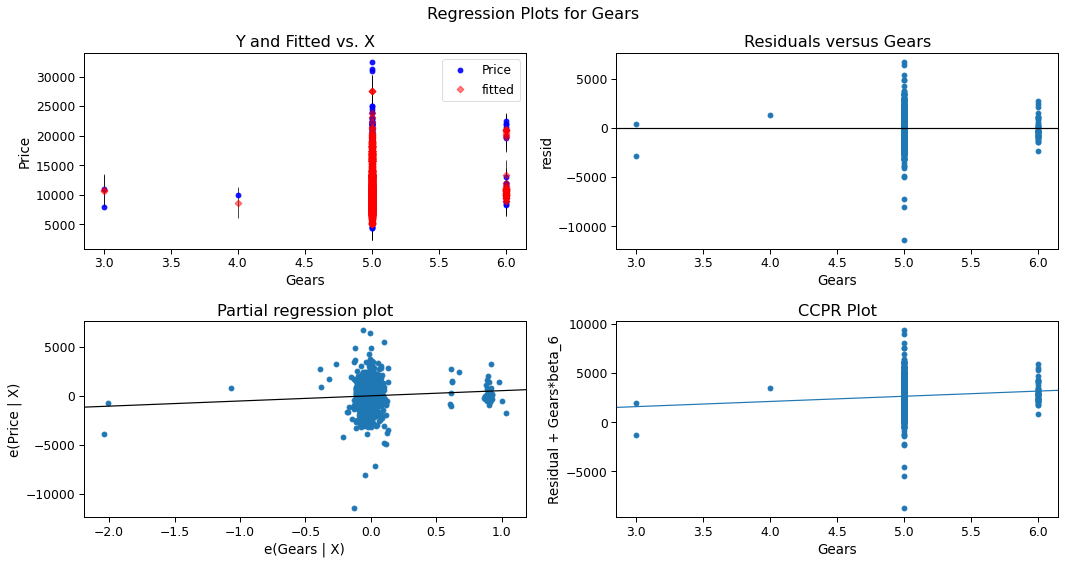

In [155]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

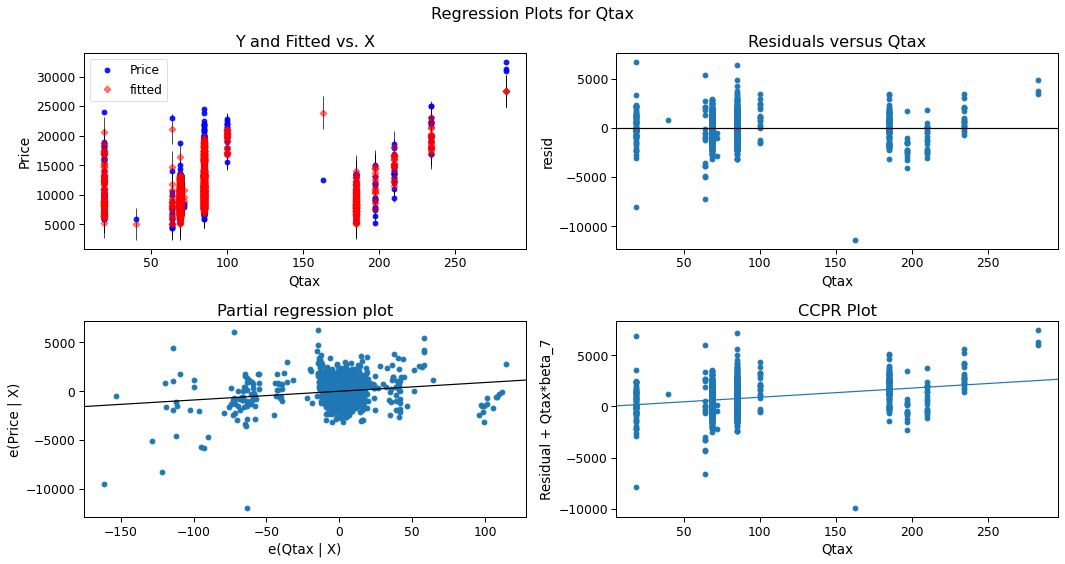

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Qtax", fig=fig)
plt.show()

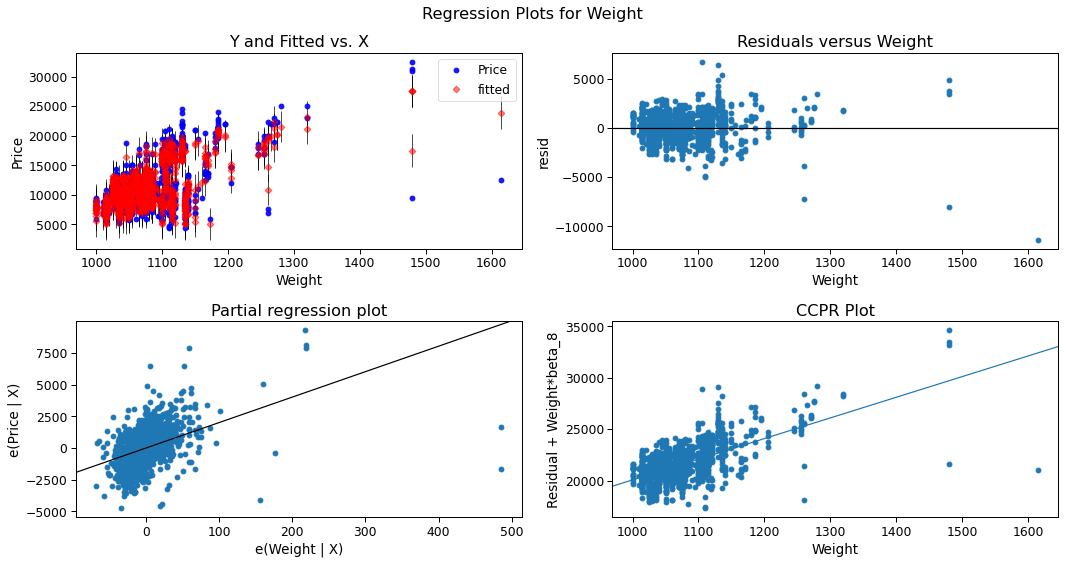

In [157]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

#### d)improving model

In [173]:
#i can think of droping Doors but i cann't find evidence or rules or error in 'doors'
#so, lets see problematic rows as well then i will decide

### 6. Dealing with problematic rows

#### a)checking influential points

showing first influential point


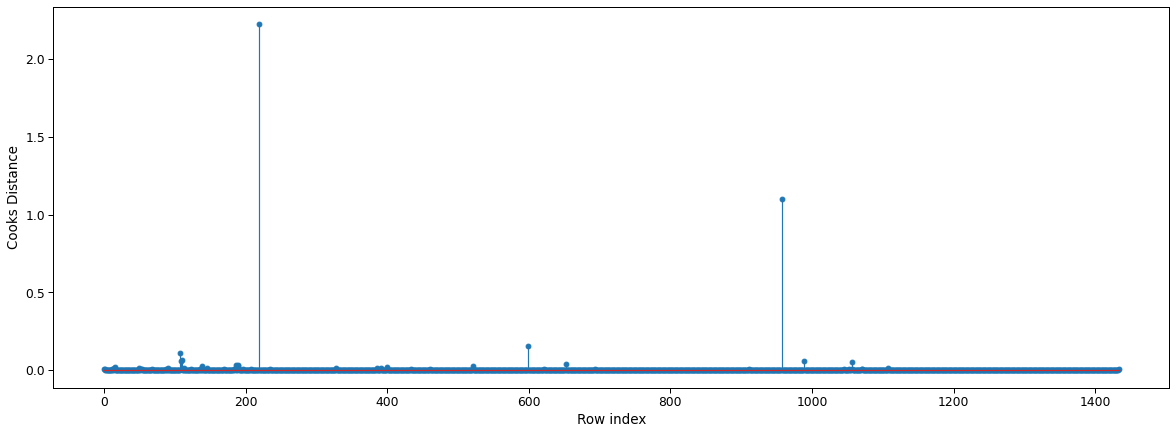

point having cook's distance > 1 is : 
219 2.2253513655271377
point having cook's distance > 1 is : 
957 2.5307796232781126
598 0.3168903540143614 it is not a highly influential point
now all the influential points are droped out
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1432 non-null   int64
 1   Age     1432 non-null   int64
 2   KM      1432 non-null   int64
 3   HP      1432 non-null   int64
 4   CC      1432 non-null   int64
 5   Doors   1432 non-null   int64
 6   Gears   1432 non-null   int64
 7   Qtax    1432 non-null   int64
 8   Weight  1432 non-null   int64
dtypes: int64(9)
memory usage: 100.8 KB


,Price,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [160]:
import statsmodels.formula.api as smf 
model_outliers = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()

model_influence = model_outliers.get_influence()
(c , _) = model_influence.cooks_distance

print("showing first influential point")
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

#loop for droping the first influential point and detecting and droping rest of influential points
while np.max(c)>1 :
    print("point having cook's distance > 1 is : ")
    print(np.argmax(c), np.max(c))
    data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
   
    model_outliers=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()    
    model_influence = model_outliers.get_influence()
    (c , _) = model_influence.cooks_distance
    if np.max(c) < 1:
        print(np.argmax(c), np.max(c),"it is not a highly influential point") 
        print("now all the influential points are droped out")
        break      
    
data1.info()
data1.head()

#### b) improving model

In [161]:
#all the influential points from data1 are dropped out. 
#now rebuild our model to see improvement

In [162]:
import statsmodels.formula.api as sms
model1 = sms.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()           
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:54:17   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.0

#### c) records with high residue

In [163]:
#note : while removing influential points we, we rearrange the index location.

In [164]:
list(np.where(model1.resid<-7500))

[array([598], dtype=int64)]

In [165]:
# data1=data1.drop(data1.index[145],axis=0).reset_index(drop=True)
# data1=data1.drop(data1.index[520],axis=0).reset_index(drop=True)
data1=data1.drop(data1.index[598],axis=0).reset_index(drop=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1431 non-null   int64
 1   Age     1431 non-null   int64
 2   KM      1431 non-null   int64
 3   HP      1431 non-null   int64
 4   CC      1431 non-null   int64
 5   Doors   1431 non-null   int64
 6   Gears   1431 non-null   int64
 7   Qtax    1431 non-null   int64
 8   Weight  1431 non-null   int64
dtypes: int64(9)
memory usage: 100.7 KB


#### d) improving model

In [166]:
import statsmodels.formula.api as sms
model2 = sms.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()           
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:54:41   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.0

In [167]:
#model2 has high rsquared value than model, which is a good thing
#model2 has significant p-values for all features than model, which is again a good thing
#model2 has less Aic value than model1, which is good
#model2 and model1 have comparatively small difference in adj_rsquared value

### 7. Final model (fitting of multilinear regression)

### a) ols method (using statmodels package)

#### a-1) model building

In [168]:
import statsmodels.formula.api as sms
final_model = sms.ols('Price~Age+KM+HP+CC+Doors+Gears+Qtax+Weight',data=data1).fit()           
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        07:54:44   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.0

In [169]:
#This is our final model with 88.5% accuracy. 

#### a-2)prediction for new values

In [170]:
val_pred=pd.DataFrame({'Age':15,"KM":139000,"HP":100,"CC":1350,"Doors":4,"Gears":5,"Qtax":50,"Weight":1200},index=[0])
val_pred

,Age,KM,HP,CC,Doors,Gears,Qtax,Weight
0,15,139000,100,1350,4,5,50,1200


In [171]:
final_model.predict(val_pred)

0    18733.369934
dtype: float64

## Model comparison

In [172]:
m_comp={'models':['model','model1','final_model'],'Rsquared':[model.rsquared,model1.rsquared,final_model.rsquared]}
result=pd.DataFrame(m_comp)
result

,models,Rsquared
0,model,0.868116
1,model1,0.883968
2,final_model,0.888240
